<h1>Differentiate Colorectal carcinoma and para-carcinoma tissue based on expression profile</h1>

<h3>Title: 	Hypoxia-induced cysteine metabolism reprogramming are crucial for the tumorigenesis of colorectal cancer</h3>
<h5>Gene Expression Omnibus: GSE223119</h5>

<b>Data Analyzer:</b> Kai-Wei Chang

<p><b>Data Owner:</b> Shiyi Yang<br>
<b>Email:</b> octoberfirst@sjtu.edu.cn<br>
<b>Affiliation:</b> Shanghai Jiao Tong University, Shanghai, China<br>

<h2>Q1: Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.</h2>

<p><b>Answer:</b><br>
This analysis wil be focused on dimensionality reduction, in addition to clustering<br>
By determining whether the gene expresison profiles capable of clustering samples according to their similarity<br>
Given vast number of genes/features, dimension reduction aim to investigate potential gene network groups.<br>

<h2>Q2: Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.</h2>

<b>Answer:</b><br>
Metabolic reprogramming is a hallmark of human cancer and cancer-specific metabolism provide opportunities for cancer diagnosis, prognosis, and treatment. However, how metabolic pathways affect the initiation and progression of colorectal cancer remain largely unknown.<br>
This data set includes 40 gene expression profiles of cancer and para-carcinoma tissue (tissue surrounding cancer).<br>
This analysis attempt to group gnes of similar regulatory network and investigate variations among samples

In [1]:
#No warning output
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<h2>Q3: Brief summary of data exploration and actions taken for data cleaning and feature engineering.</h2>

<b>Answer:</b><br>
Data Exploration:
- Raw data is composed of gene ID, gene expression on each sample, gene names, and database and gene network category<br>
- Gene expression has been preprocessed by the data provider, with no missing values<br>
- This data set contain extremely high amount of features (ie. 61,700 genes)<br>

Data Engineering:
- For the project purpose, only gene ID (feature), gene expression, and tissue origin will be considered:
- Removing features that are not expressing or have very low variability among all profiles<br>
- Gene expression may or may not be skewed, standardization is applied<br>

<p>Detail analysis see below

In [2]:
#Import Data processing libraries
import numpy as np
import pandas as pd

In [3]:
#Load Data, data is preprocessed
rawData=pd.read_csv(r'C:\Users\kai-w\Desktop\04_Unsupervised Machine Learning\GSE223119_MJ20190424016-gene.tpm.matrix.annot.txt',sep='\t',header=0)

In [4]:
#Data overview
rawData.head()

,Unnamed: 0,C10,C11,C12,C13,C14,C15,C18,C1,C20,...,cog,cog_description,KO_id,KO_name,paths,pfam,go,nr,swissprot,entrez
0,ENSG00000000003,61.65,37.27,85.58,68.76,32.17,49.63,64.18,10.96,36.86,...,ENOG4111IRY(S:Function unknown),ENOG4111IRY(Tenomodulin),K17295,TSPAN6,NaN,PF00335.17(Tetraspannin:Tetraspanin family),GO:0039532(biological_process:negative regulat...,NP_003261.1(tetraspanin-6 isoform a [Homo sapi...,sp|O43657|TSN6_HUMAN(Tetraspanin-6 OS=Homo sap...,7105.0
1,ENSG00000000005,0.31,3.39,1.34,2.24,0.25,4.48,1.64,0.15,0.89,...,ENOG410YB96(S:Function unknown),ENOG410YB96(Tenomodulin),NaN,NaN,NaN,PF04089.11(BRICHOS:BRICHOS domain),GO:0005737(cellular_component:cytoplasm); GO:0...,XP_006986474.1(PREDICTED: tenomodulin [Peromys...,sp|Q9H2S6|TNMD_HUMAN(Tenomodulin OS=Homo sapie...,64102.0
2,ENSG00000000419,81.96,34.78,56.60,81.13,49.78,121.31,91.79,39.23,41.02,...,COG0463(M:Cell wall/membrane/envelope biogenesis),"COG0463(Glycosyl transferase, family 2)",K00721,DPM1,map00510(N-Glycan biosynthesis),PF00535.23(Glycos_transf_2:Glycosyl transferas...,GO:0019673(biological_process:GDP-mannose meta...,NP_001303964.1(dolichol-phosphate mannosyltran...,sp|O60762|DPM1_HUMAN(Dolichol-phosphate mannos...,8813.0
3,ENSG00000000457,4.98,1.42,2.84,4.01,4.90,3.86,3.63,4.08,3.95,...,ENOG410XQTG(S:Function unknown),ENOG410XQTG(S. cerevisiae),K17542,SCYL3,NaN,PF00069.22(Pkinase:Protein kinase domain); PF0...,GO:0005794(cellular_component:Golgi apparatus)...,XP_003893590.2(protein-associating with the ca...,sp|Q8IZE3|PACE1_HUMAN(Protein-associating with...,57147.0
4,ENSG00000000460,7.14,1.99,2.80,9.40,5.90,4.13,9.92,4.05,4.21,...,ENOG4110VTC(S:Function unknown),ENOG4110VTC(Chromosome 1 open reading frame 112),NaN,NaN,NaN,PF14868.3(DUF4487:Domain of unknown function (...,NaN,XP_005245374.1(uncharacterized protein C1orf11...,sp|Q9NSG2|CA112_HUMAN(Uncharacterized protein ...,55732.0


In [5]:
#Data types for each column
rawData.dtypes

Unnamed: 0          object
C10                float64
C11                float64
C12                float64
C13                float64
C14                float64
C15                float64
C18                float64
C1                 float64
C20                float64
C22                float64
C23                float64
C24                float64
C25                float64
C3                 float64
C4                 float64
C5                 float64
C6                 float64
C7                 float64
C8                 float64
C9                 float64
P10                float64
P11                float64
P12                float64
P13                float64
P14                float64
P15                float64
P18                float64
P1                 float64
P20                float64
P22                float64
P23                float64
P24                float64
P25                float64
P3                 float64
P4                 float64
P5                 float64
P

In [6]:
#Transpose so treat genes as feature, and each profile as independent record
data=rawData.loc[:,rawData.columns.str.match('^C|^P')].rename(index=rawData['Unnamed: 0']).T
data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,MSTRG.9662,MSTRG.9664,MSTRG.9666,MSTRG.9667,MSTRG.9925,MSTRG.9927,MSTRG.9942,MSTRG.9966,MSTRG.9967,MSTRG.9974
C10,61.65,0.31,81.96,4.98,7.14,4.40,15.56,38.45,18.87,12.65,...,0.02,0.00,0.0,0.13,0.37,0.00,0.54,0.96,0.14,0.00
C11,37.27,3.39,34.78,1.42,1.99,3.10,5.15,34.72,11.98,3.12,...,0.10,6.57,0.0,1.17,0.61,1.78,0.14,1.46,0.60,3.58
C12,85.58,1.34,56.60,2.84,2.80,5.31,8.48,29.41,25.83,11.12,...,0.07,0.00,0.0,0.20,0.17,0.50,0.98,1.56,0.07,4.64
C13,68.76,2.24,81.13,4.01,9.40,4.46,14.99,45.74,25.93,13.76,...,0.04,0.00,0.0,0.33,0.75,0.23,1.10,2.13,1.38,0.00
C14,32.17,0.25,49.78,4.90,5.90,2.46,10.40,33.28,17.18,11.91,...,0.27,7.07,0.0,0.36,0.54,0.20,0.42,1.75,0.39,5.30


In [7]:
#Assign tissue types for validation purpose
Tissue=data.index.str[0:1]
Tissue

Index(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
      dtype='object')

In [8]:
#check for presence of empty values
data.isna().values.sum()

0

In [9]:
#huge feature size, reduce by taking randomly 5000 for the purpose of the project
data.shape

(40, 61700)

In [10]:
#some features/genes have low variability, remove those
feature_var=pd.DataFrame([[i, data[i].std()] for i in data.columns],
                         columns=['feature', 'std']).set_index('feature')
print(feature_var[feature_var['std']>0].sort_values('std'))

                          std
feature                      
ENSG00000232264      0.001581
ENSG00000228856      0.001581
ENSG00000231051      0.001581
ENSG00000133105      0.001581
ENSG00000156925      0.001581
...                       ...
ENSG00000211890   6428.959034
ENSG00000240040   6780.842254
ENSG00000212907   7435.193295
ENSG00000198804   8216.179258
ENSG00000228253  18410.117553

[41928 rows x 1 columns]


array([[<AxesSubplot:title={'center':'ENSG00000000003'}>,
        <AxesSubplot:title={'center':'ENSG00000000005'}>,
        <AxesSubplot:title={'center':'ENSG00000000419'}>,
        <AxesSubplot:title={'center':'ENSG00000000457'}>,
        <AxesSubplot:title={'center':'ENSG00000000460'}>],
       [<AxesSubplot:title={'center':'ENSG00000000938'}>,
        <AxesSubplot:title={'center':'ENSG00000000971'}>,
        <AxesSubplot:title={'center':'ENSG00000001036'}>,
        <AxesSubplot:title={'center':'ENSG00000001084'}>,
        <AxesSubplot:title={'center':'ENSG00000001167'}>]], dtype=object)

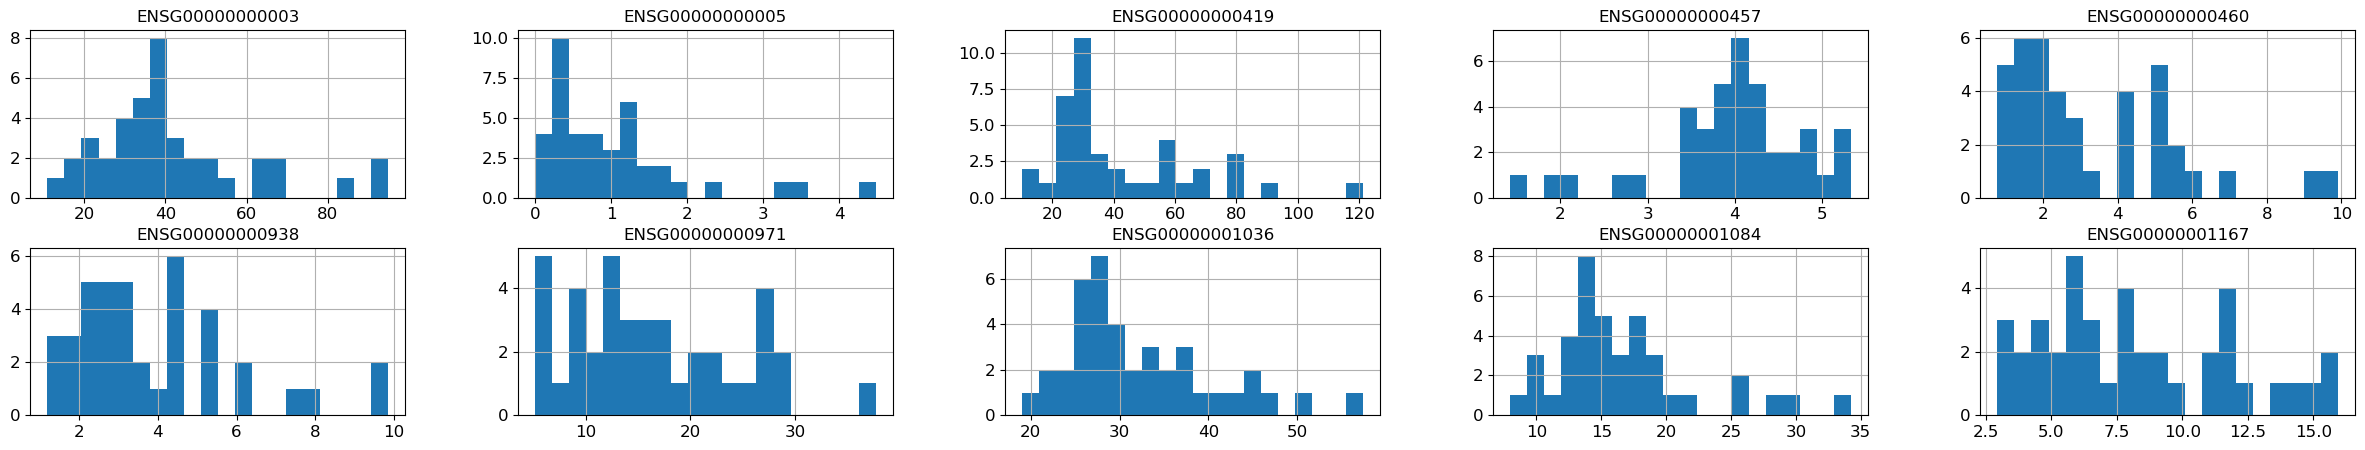

In [11]:
#some features are skwed and some are not, vary dependent on genes
import matplotlib

params = {'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
data[data.columns[0:10]].hist(bins=20,figsize=(30, 5),layout=(2,5))

In [12]:
#keep a copy prior log transform
preProcData = data.copy()
data=preProcData.copy()
print(data.skew()[0:10],"\n============")
print((data.skew()>0.7).value_counts())

ENSG00000000003    1.194026
ENSG00000000005    1.905369
ENSG00000000419    1.374684
ENSG00000000457   -1.051250
ENSG00000000460    1.258411
ENSG00000000938    1.251004
ENSG00000000971    0.582230
ENSG00000001036    1.045505
ENSG00000001084    1.317785
ENSG00000001167    0.528714
dtype: float64 
True     33826
False    27874
dtype: int64


<h2>Q4: Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.</h2>

<b>Answer:</b><br>
KMeans, Hierarchial agglomerative clustering, and DBSCAN are to be evaluated<br>

<h3>Preprocessing</h3>

In [13]:
#Load preprocessing libraries
from sklearn.preprocessing import StandardScaler

In [14]:
#subset of data for standardize and binarize labels
X=pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
X.index=data.index
print(X.iloc[:5,:4])

     ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457
C10         1.028091        -0.761688         1.675252         1.203712
C11        -0.231023         2.524024        -0.323847        -3.010909
C12         2.263965         0.337105         0.600704        -1.329796
C13         1.395290         1.297216         1.640084         0.055346
C14        -0.494414        -0.825695         0.311729         1.109002


True     33826
False    27874
dtype: int64


array([[<AxesSubplot:title={'center':'ENSG00000000003'}>,
        <AxesSubplot:title={'center':'ENSG00000000005'}>,
        <AxesSubplot:title={'center':'ENSG00000000419'}>,
        <AxesSubplot:title={'center':'ENSG00000000457'}>,
        <AxesSubplot:title={'center':'ENSG00000000460'}>],
       [<AxesSubplot:title={'center':'ENSG00000000938'}>,
        <AxesSubplot:title={'center':'ENSG00000000971'}>,
        <AxesSubplot:title={'center':'ENSG00000001036'}>,
        <AxesSubplot:title={'center':'ENSG00000001084'}>,
        <AxesSubplot:title={'center':'ENSG00000001167'}>]], dtype=object)

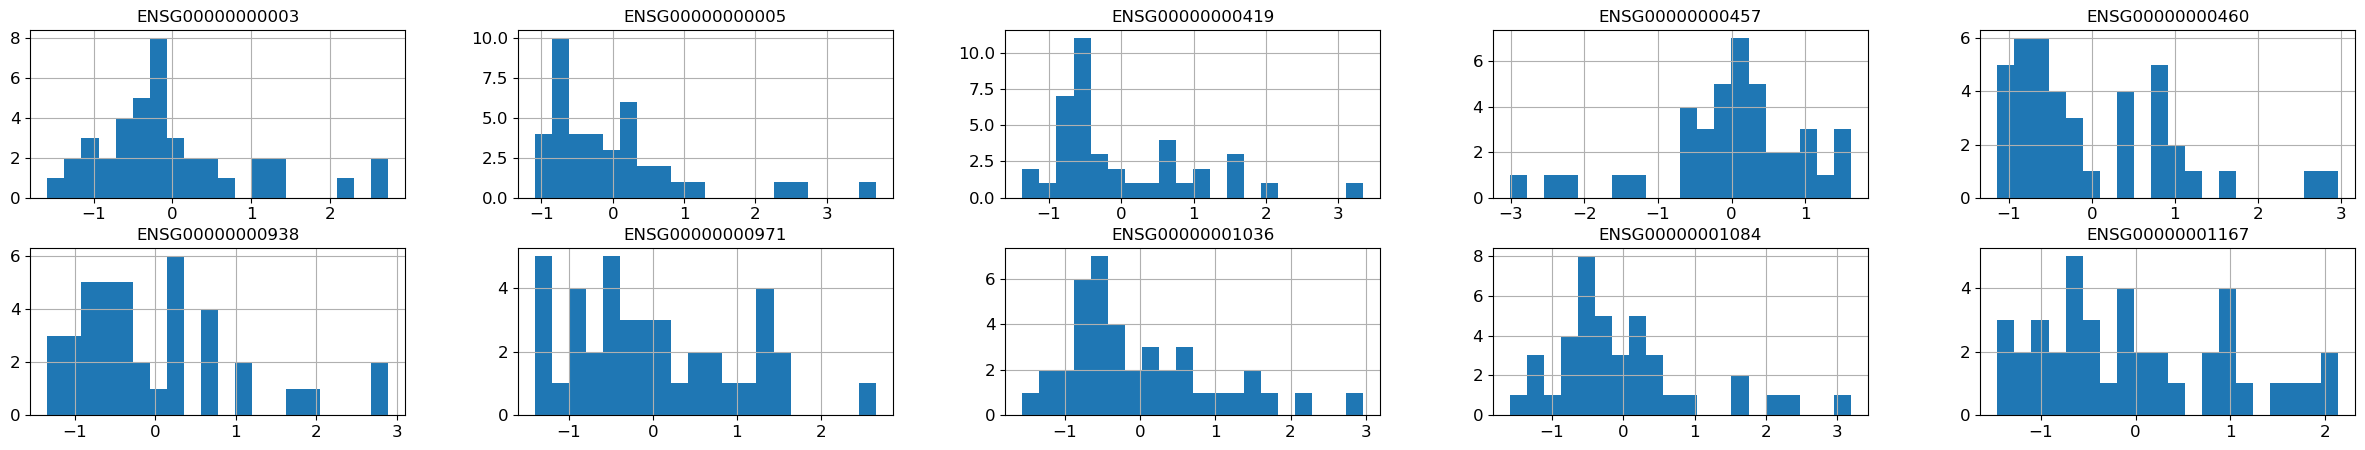

In [15]:
#data distribution after standard scaling, some skewness presist
print((X.skew()>0.7).value_counts())
X.iloc[:,:10].hist(bins=20,figsize=(30, 5),layout=(2,5))

In [16]:
#Load ploting library
import matplotlib.pyplot as plt, seaborn as sns

#Load libraries for unsupervised models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy agglomeration
from sklearn.cluster import DBSCAN #DBSCAN

import time

<h4>KMeans</h4>

In [17]:
#Kmeans clustering
km=KMeans(n_clusters=2, random_state=42, n_init="auto", algorithm='lloyd')
km=km.fit(X)
km_X=km.fit_predict(X)

print("Clustered:", km_X,"\n", pd.DataFrame(km_X).value_counts(),"\n========")
print("Original:", Tissue.to_list(),"\n", pd.DataFrame(Tissue.to_list()).value_counts())

Clustered: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1] 
 1    28
0    12
dtype: int64 
Original: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'] 
 C    20
P    20
dtype: int64


<h4>Hierarchy agglomeration</h4>

In [18]:
#Hierarchy agglomeration
metrics = ["euclidean", "manhattan", "cosine"]
linkages = ["ward","single","average","complete"]
hierCond = pd.DataFrame()
for metric in metrics:
    lnkLst = []
    for linkage in linkages:
        try:
            ac=AgglomerativeClustering(n_clusters=2, metric=metric, linkage=linkage, compute_full_tree=True)
            ac=ac.fit(X)
            ac_X=ac.fit_predict(X)
            ac_X = pd.DataFrame(ac_X==1).value_counts().max()
        except:
            ac_X = -1
        lnkLst = lnkLst + [ac_X]
    hierCond[metric] = lnkLst
hierCond.index=linkages
print('CLuster with highest number of items, -1 indicate no calculation')
hierCond


CLuster with highest number of items, -1 indicate no calculation


,euclidean,manhattan,cosine
ward,23,-1,-1
single,39,39,39
average,39,31,21
complete,24,24,23


In [19]:
#cosine similarity with average linkage seem give best clustering, should it compare with tissue origin
ac=AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='average', compute_full_tree=True)
ac=ac.fit(X)
ac_X=ac.fit_predict(X)
print(ac_X)
print(Tissue.to_list())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']


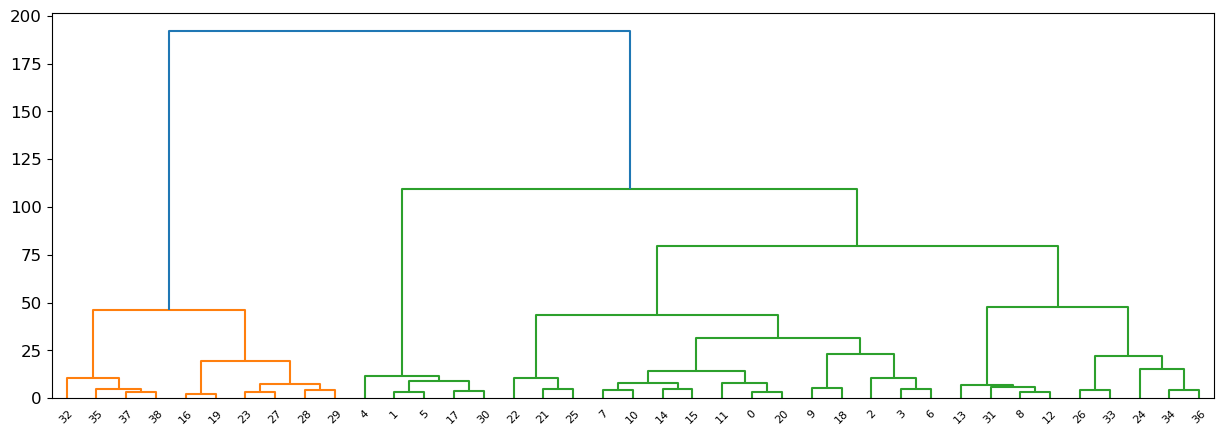

In [20]:
#Hierarchy agglomeration plot
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ac.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=40, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

Hierarchy.linkage is limited with 'ward' method, which does not capture cosine distance

<h4>DBSCAN on samples</h4>

In [21]:
#using GridSearchCV to test a selection of eps and min_samples

nOut = [] #outliers
n1=[]
n2 = []
for i in range(200,300,2):
    ds=DBSCAN(eps=i, min_samples=2,n_jobs=2)
    ds=ds.fit(X)
    ds_X=ds.fit_predict(X)
    nOut=nOut + [((i,(ds_X==-1).sum()))]
    n1=n1 + [((i,(ds_X==0).sum()))]
    n2=n2 + [((i,(ds_X==1).sum()))]

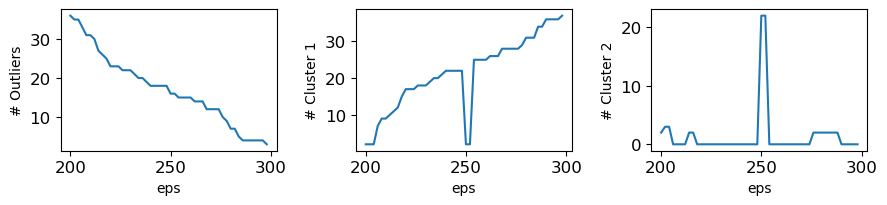

In [22]:
fig, axs = plt.subplots(1,3,figsize=(9,2))
fig.tight_layout(pad=1.0)
axs[0].plot(*zip(*nOut))
axs[0].set_xlabel('eps')
axs[0].set_ylabel('# Outliers')
axs[1].plot(*zip(*n1))
axs[1].set_xlabel('eps')
axs[1].set_ylabel('# Cluster 1')
axs[2].plot(*zip(*n2))
axs[2].set_xlabel('eps')
axs[2].set_ylabel('# Cluster 2')
plt.show()

DBSCAN seem not suitable for clustering samples based on gene expression profiles.

<h2>Q5: A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.</h2>

<b>Answer:</b><br>
For this data set, hierarchical agglomerication clustering seem perform the best, with cosine distance and linkage method be average.<br>

<h2>Q6: Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.</h2>

<b>Answer:</b><br>
According to the clustering outcomes, the distance based on gene expression can vary in terms of magnitude. It seems cosine distance is less affected and able to capture the best clustering results. Kmeans and DBSCAN which apply intuitive sense of in theit algorithm seem not very suit for gene expression profiles, which magnitude plays less effect than the relative "angle" between samples.
<br>

<h2>Q7: Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.</h2>

<b>Answer:</b><br>
Given vast number of variables/features and few tissue samples, reducing dimension or finding representative axis that approximate combinatory explanation of gene groups may provide further insights to the gene regulatory networks.